# 実践コンピュータビジョン

[実践 コンピュータビジョン](https://www.oreilly.co.jp/books/9784873116075/)  
[Multiple View Geometry in Computer Vision](https://www.amazon.co.jp/dp/0521540518)(以下、MVGCVと呼ぶ) 

演習ノート

# 5. 多視点幾何学

## 5.1 エピポーラ幾何

### 導出1
[エピポーラ幾何 - Qiita](https://qiita.com/Thought_Nibbler/items/9cb7c2637000eecc1a30)

<img src="figures/50Epipolar_geometry.jpg" width="500">

>「カメラ $O_L$ から見ると $X_L$ に物体が写っている」ことしか分かっていない時点では、 $X, X_1, X_2, X_3$ のどこに物体があるかわからない。「カメラ $O_R$ から見て $X_R$ に同じ物体が写っている」ことも分かった場合は、 $X$ に物体があると特定できる。
>
>- **エピポーラ線（Epiline）** : 図の赤線
>    - 「カメラ $O_L$ から見て $X_L$ に物体が写っている」とき、「カメラ $O_R$ から見てどこに物体が写るか」の候補
>
>- **エピポール（Epipole）** : 図の点 $e_L, e_R$
>    - 一方のカメラから他方のカメラが写る位置のこと
>    - 物体の位置に関係なく一定
>    - どの物体のエピポーラ線もエピポールで交わる
>
>- **エピポーラ面（Epipolar Plane）** : 図の緑面 $O_L X O_R$
>    - 物体の位置と2つのカメラ位置の3点で決まる平面
>    - エピポーラ線・エピポールはエピポーラ面上にある

<img src="figures/51epiploar_vector.jpg" width="800">

>エピポーラ線の方程式を $ax + by + c = 0$ とし、さらに係数ベクトル $(a, b, c)$ を $\boldsymbol{l}$ とする。
すると、(1-1)は以下のように書き換えられる。
>
>「 $\boldsymbol{p'} = (x_{p'}, y_{p'}, 1)$ は $\boldsymbol {p'} \cdot \boldsymbol{l} = a x_{p'} + b y_{p'} + c = 0$ を満たす」
$\Leftrightarrow$ 「$\boldsymbol{p'} = (x_{p'}, y_{p'}, 1)$ は $\boldsymbol{l}$ と常に垂直である」 --- (1-2)
>
>これを満たす $\boldsymbol{l}$ を決めたい。 $\boldsymbol{p'}$ はエピポーラ面上にあるため、 $\boldsymbol{l}$ はエピポーラ面に垂直であればよい。
>よって、 $\boldsymbol{l} = \boldsymbol{t} \times R \ \boldsymbol{p}$ とする（以下理由より）。
>
>- 理由
>    - 2つのベクトルの外積はそれらのベクトルが張る平面に垂直である（外積の定義より）
>    - $\boldsymbol{t}$ はエピポーラ面上のベクトルである（図より）
>        - 図では始点が $C$ だが、ここでは $C'$ 座標系で取り扱っていることに注意
>    - $R \ \boldsymbol{p}$ はどちらもエピポーラ面上のベクトルである
>        - $C$ 座標系の $\boldsymbol{p}$ を $C'$ 座標系で取り扱うために $R$ を作用させている

>ここで、 $E = [\boldsymbol{t}]_{\times} R$ とおく。この $E$ を**基本行列（Essential Matrix）**と呼ぶ。
基本行列 $E$ を用いて(1-4)の条件式を書き換えると、以下のようになる。
>
>$$\boldsymbol{p'}^T \ E \ \boldsymbol{p} = 0 \tag{1}$$
>
>これが、基本行列を用いて表したエピポーラ拘束であり、上記2.における $\boldsymbol{p}$ に求められる条件でもある。

### 導出2
MVGCV P241 "9.2 The fundamental matrix F"より  
以下は要点だけを抜き出す

#### 9.2.1 Geometric derivation

- $\boldsymbol{x}$を$\boldsymbol{x}'$にホモグラフィー$H_\pi$で射影する
- エピポール$\boldsymbol{e}'$と$\boldsymbol{x}'$を結んだ線がエピポーラ線である。

よってエピポーラ線$\boldsymbol{l}'$は次のように表せる。
$$
\boldsymbol{l}'=\boldsymbol{e}'\times\boldsymbol{x}'=[\boldsymbol{e}']_\times H_\pi\boldsymbol{x}=F\boldsymbol{x}
$$

($\boldsymbol{x}$などのここで2次元座標上の点は2次元射影空間で表しているので、射影空間を図示すると、点は線に、線は平面するとすれば考えやすい。そうすると、エピポーラ線$\boldsymbol{e}'\times\boldsymbol{x}'$は図示すると平面を表し、その平面と$z=1$の平面の交線がエピポーラ線であると理解するといいのかもしれない。射影空間の図示については次の記事参照。)

https://solkul.hatenablog.com/entry/2021/01/15/113702

### 9.2.2 Algebraic derivation
$x=PX$の逆を考えると、3次元上の点$X$は直線$X(\lambda)=P^+x+\lambda C$上に存在するはずである。(どこかは分からない)。$\lambda=\infty$の点$C$と、$\lambda=0$の点$P^+x$を考えて、2つ目の画像上に射影すると、それぞれ$P'C$、$P'P^+x$である。上と同様に、
$$
l'=P'C\times P'P^+x
$$
なので、
$$
F=P'C\times P'P
$$
である。

#### Example 9.2
ここで世界原点が、1番目のカメラの中心にあったとする。
$$
P=K[I|0]\\
P'=K'[R|t]\\
$$
なので、
$$
P^+=\begin{bmatrix}
K^{-1}\\
0^T
\end{bmatrix}\\
C=\begin{pmatrix}
0\\
1
\end{pmatrix}
$$
である。
この時スケールの違いを除いて
$$
F=[P'C]_\times P'P=K'^{-T}[t]_\times RK^{-1}
$$
と計算できる。途中で(これが実践コンピュータービジョンp104の導出となる。)

### 基本行列の性質

- 転置:$P,P'$に対する基本行列が$F$なら、$P',P$に対する基本行列は$F^T$である
- エピポール点:画像1でのカメラ2の座標$e$について、全ての$x'$に対し、$x'Fe=0$なので、$Fe=0$である。つまり$e$は$F$の核である。

### 理想と現実
ただ、この記事によると実際は多数の視点で最適化(バンドル調整？)するので↑の説明は理想的な場合の話らしい
https://cvml-expertguide.net/terms/epipolar-geometry/  

### 5.1.1 サンプルコード
merton collegeのデータを読み込む

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from scipy import linalg

import sys
sys.path.append("../")
from impro import impro,camera

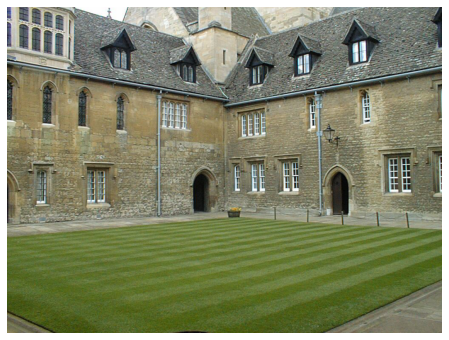

In [2]:
# 対象となるmerton collegの画像を表示
im1_path=Path("resources/oxford_muliti/merton_college/images/001.jpg")
im1=cv2.imread(str(im1_path))
im2_path=Path("resources/oxford_muliti/merton_college/images/002.jpg")
im2=cv2.imread(str(im2_path))
impro.imshow(im1)

In [11]:
# 各画像上の2Dの点のリストを読み込む
corner_2d_dir=Path("resources/oxford_muliti/merton_college/2D")

corner_2d_list=[]

for i in range(3):
    corner_2d_path=corner_2d_dir/f"00{i+1}.corners"
    # 読み込んで転置する
    corner_2d_list.append(np.loadtxt(corner_2d_path).T)

# 2x643の2次元上の座標の集まり
corner_2d_list[0]

array([[718.79 , 676.587, 675.319, ..., 479.229, 475.771, 474.916],
       [263.096, 424.715, 394.656, ..., 441.16 , 429.052, 419.315]])

In [12]:
# 3Dの点を読み込む
# 各画像上の2Dの点のリストを読み込む
corner_3d_path=Path("resources/oxford_muliti/merton_college/3D/p3d")
# 読み込んで転置する
corner_3d=np.loadtxt(corner_3d_path).T
# 3x717の3次元上の座標の集まり
corner_3d

array([[ 3.7585792 ,  1.0378863 ,  1.5606923 , ...,  2.7471349 ,
         0.73672803,  0.97395698],
       [-0.44845037, -0.54627892, -0.5211711 , ...,  1.4925585 ,
         0.6206597 ,  0.64403613],
       [ 4.4300374 ,  3.4601538 ,  3.4636809 , ...,  0.00678837,
        -0.17002507, -0.23360821]])

In [5]:
# 対応関係を読み込む
corr = np.genfromtxt("resources/oxford_muliti/merton_college/2D/nview-corners",dtype="int",missing_values="*")
# 内容は717x3で、0枚目の画像上の特徴点が、
# 1枚目、2枚目の何番目の画像の特徴点に対応するかを表したもの
# dtypeをint型にすると、int型にはfloatのようなnanがないので、欠損地は-1としてくれる
corr

array([[  0,  -1,   0],
       [  1,   0,  -1],
       [  2,   1,  -1],
       ...,
       [639, 665, 511],
       [640, 666, 512],
       [641, 667, 513]])

In [6]:
# カメラパラメータを読み込む
mtx_p_list=[]

for i in range(3):
    mtx_p_path=corner_2d_dir/f"00{i+1}.P"
    mtx_p_list.append(np.loadtxt(mtx_p_path))

# 内容は3x4で、ワールド座標系→画像座標系への変換行列P
mtx_p_list[0]

array([[ 2.27224879e+01, -1.11393879e+03,  4.40356817e+02,
         1.08269067e+04],
       [-1.07645514e+03, -2.83464236e+02, -3.13692876e+02,
         1.01983684e+04],
       [ 6.52878802e-02, -6.78874121e-01, -7.31346307e-01,
         2.12807831e+01]])

#### サンプルデータを使ってみる
カメラクラスを使って、画像上に射影してみる

In [14]:
# 3次元上の座標を4x717の同次座標に変換する
corner_hmg=np.vstack(
    [
        corner_3d,
        np.ones(corner_3d.shape[1])
    ]
)
corner_hmg

array([[ 3.7585792 ,  1.0378863 ,  1.5606923 , ...,  2.7471349 ,
         0.73672803,  0.97395698],
       [-0.44845037, -0.54627892, -0.5211711 , ...,  1.4925585 ,
         0.6206597 ,  0.64403613],
       [ 4.4300374 ,  3.4601538 ,  3.4636809 , ...,  0.00678837,
        -0.17002507, -0.23360821],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [25]:
# カメラオブジェクトを作成する
cam_list=[camera.Camera(mtx_p) for mtx_p in mtx_p_list]
# 1枚目のカメラオブジェクトに基づいて、
# 3次元上のコーナー座標をワールド座標系→画像座標系へ射影する
x=cam_list[0].project(corner_hmg)

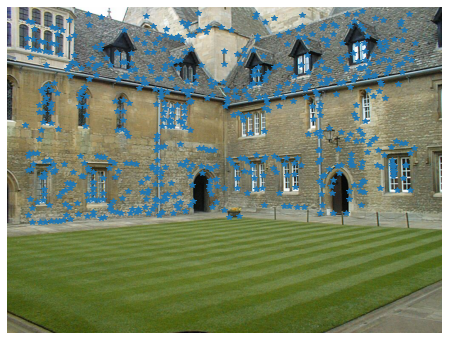

In [27]:
# 1枚目の画像上に読み込んだコーナー特徴点を重ねて表示する
impro.imshow(im1)
plt.plot(corner_2d_list[0][0,:],corner_2d_list[0][1,:],"*")

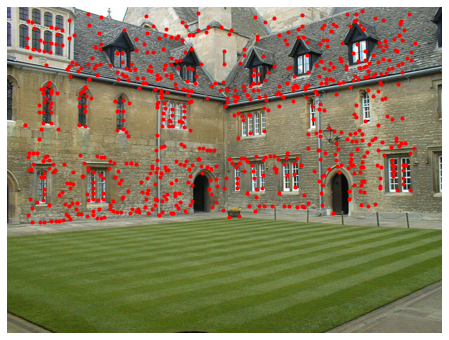

In [28]:
# 1枚目の画像上にコーナー特徴点を重ねて表示する
impro.imshow(im1)
plt.plot(x[0,:],x[1,:],"r.")

> よく見ると、3Dの点を射影したもののほうが点が多くなっています。第2、第3の画像から復元されたけれど、第1の画像からは検出されなかった特徴点があるからです。

### Matplotlibによる3Dデータの描写
jupyter notebook上でmatplotlibの3Dデータを図示する方法は、以下参照  
https://python-academia.com/matplotlib-3d/

<IPython.core.display.Javascript object>


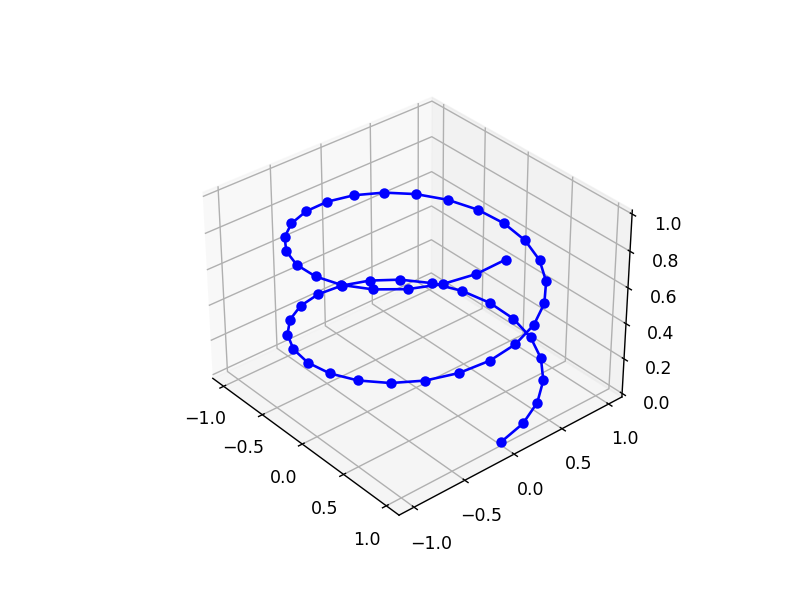

In [34]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(0, np.pi * 4, 50)
x = np.cos(t)
y = np.sin(t)
z = np.linspace(0,1,50)

fig=plt.figure()
ax=fig.add_subplot(projection="3d")
plt.cla()
ax.plot(x, y, z, marker='o', markersize=5, color='blue')

plt.show()

<IPython.core.display.Javascript object>


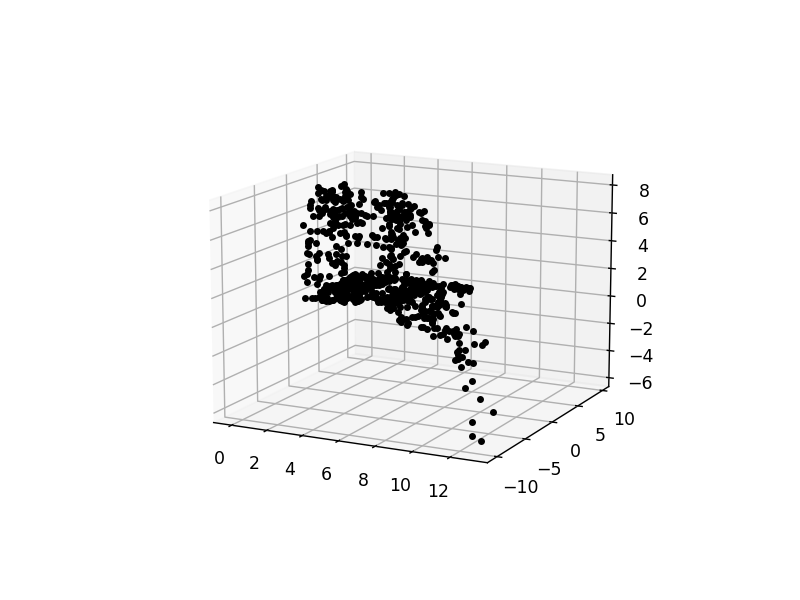

In [36]:
# サンプルデータの3D点を図示する
fig=plt.figure()
ax=fig.add_subplot(projection="3d")
plt.cla()
ax.plot(corner_3d[0,:],corner_3d[1,:], corner_3d[2,:], "k.")

plt.show()

### 5.1.3 F行列の計算 8点法

## 5.3 多視点による復元

キャリブレーション行列$K_1、K_2$は既知だとし、世界原点がカメラ1の中心だとすると
- 特徴点同士の対応で$F$が計算できる。
- $F$から$P_2$が計算できる。
- $P_1,P_2$から$X$が計算できる